In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
categories_df_final = pd.read_csv('categories_df_final.csv')

In [4]:
orders_qual = pd.read_csv('orders_qual.csv')
products_qual = pd.read_csv('products_qual.csv')
#discounts_df = pd.read_csv('discounts_df.csv')
discount_categories_new_df = pd.read_csv('discount_categories_new_df.csv')
discount_categories_ref_df = pd.read_csv('discount_categories_ref_df.csv')
discounts_categories_df = pd.read_csv('discounts_categories_df.csv')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

## Create a scatter plot to explore the relationship between the recommended price for a product (products.price) and the price that products actually sold for (orderlines.unit_price)

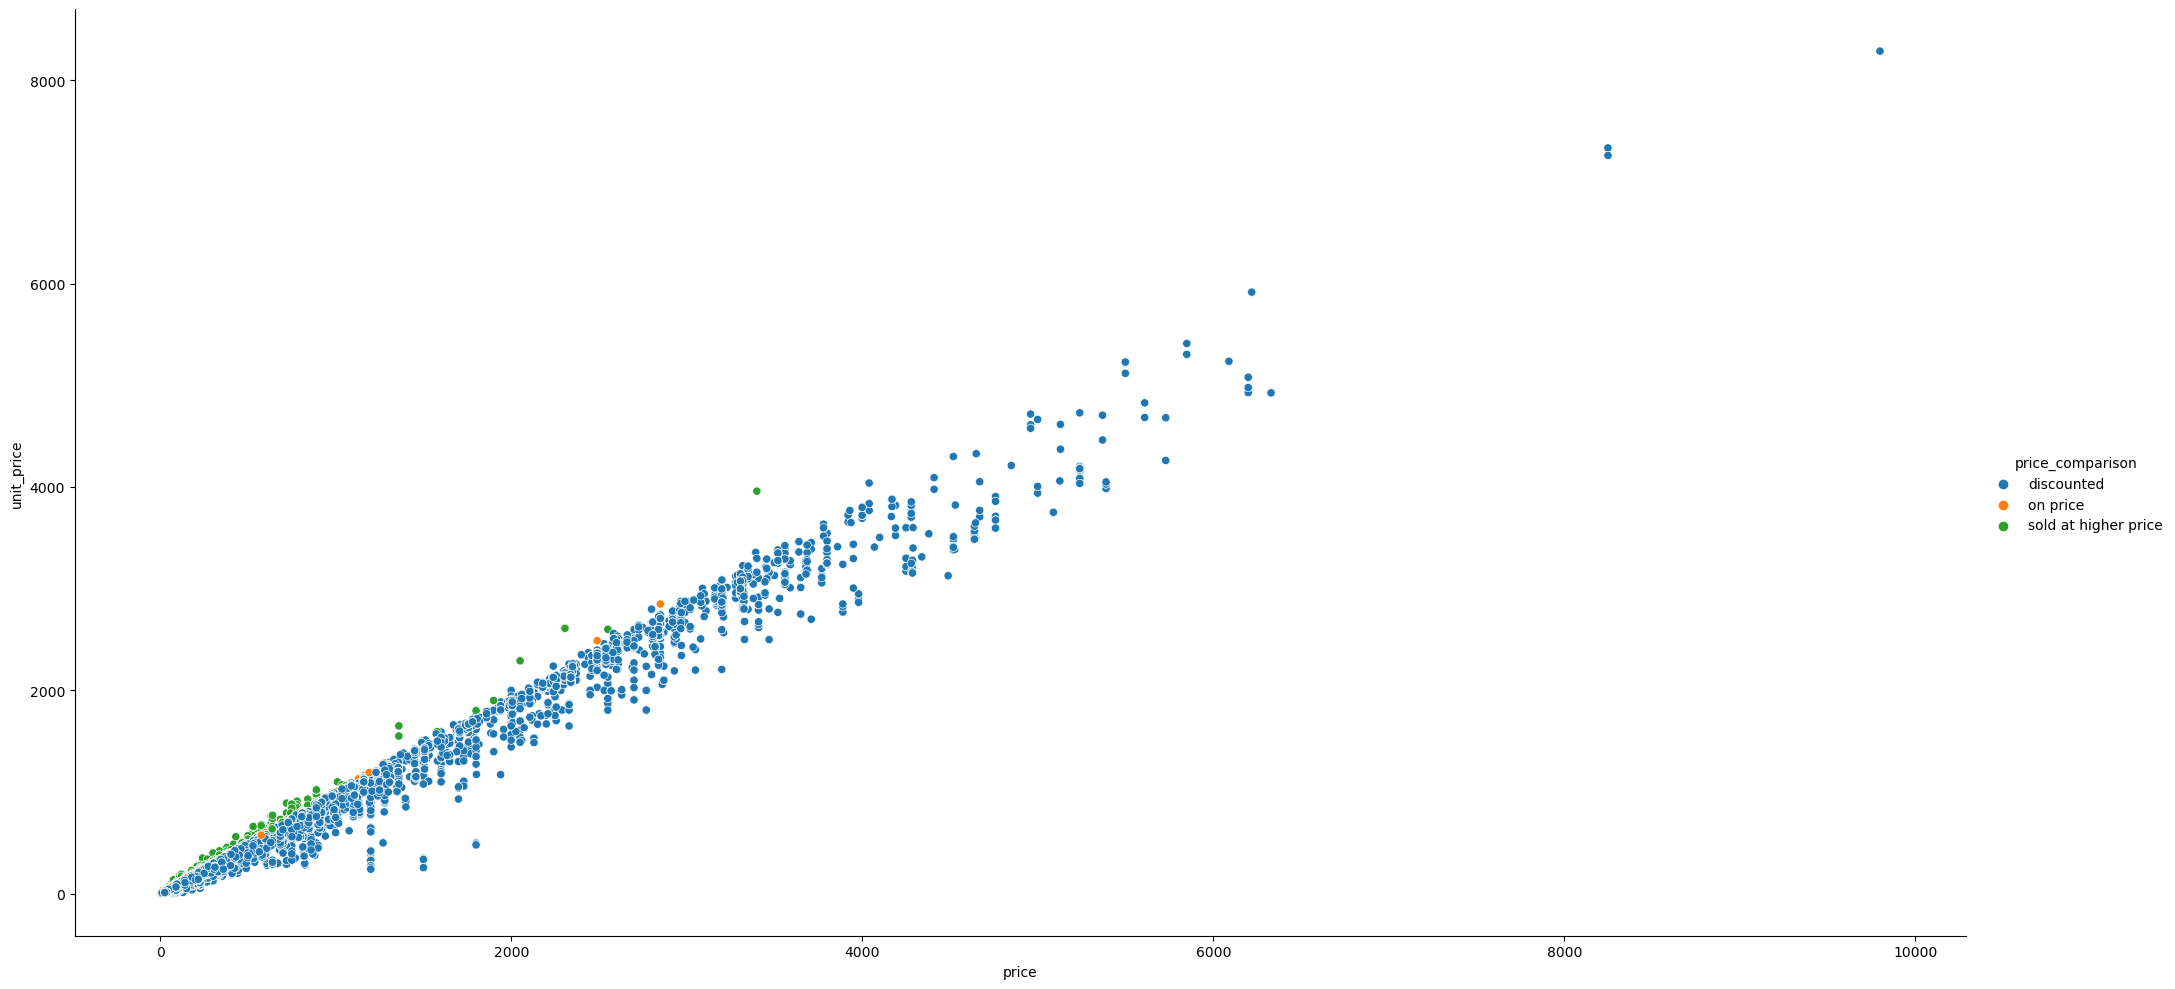

In [5]:
discounts_categories_df["price_comparison"] = discounts_categories_df.apply(lambda x:
            "discounted" if x.unit_price/x.price < 1
            else ("sold at higher price" if x.unit_price/x.price > 1
                    else "on price")
            , axis=1)

sns.relplot(
    data=discounts_categories_df,
    x='price',
    y='unit_price',
    height=10,
    aspect=2,
    hue='price_comparison'
);

## Let's investigate when customers like to spend more money. Display the average daily price of an order on a line plot.

In [6]:
orders_qual['created_date'] = pd.to_datetime(orders_qual['created_date'])
orders_qual_day = orders_qual.groupby(orders_qual['created_date'].dt.date)['total_paid'].mean().round(2).reset_index()

In [7]:
orders_qual_day.head()

,created_date,total_paid
0,2017-01-01,276.54
1,2017-01-02,187.45
2,2017-01-03,201.37
3,2017-01-04,282.53
4,2017-01-05,171.70


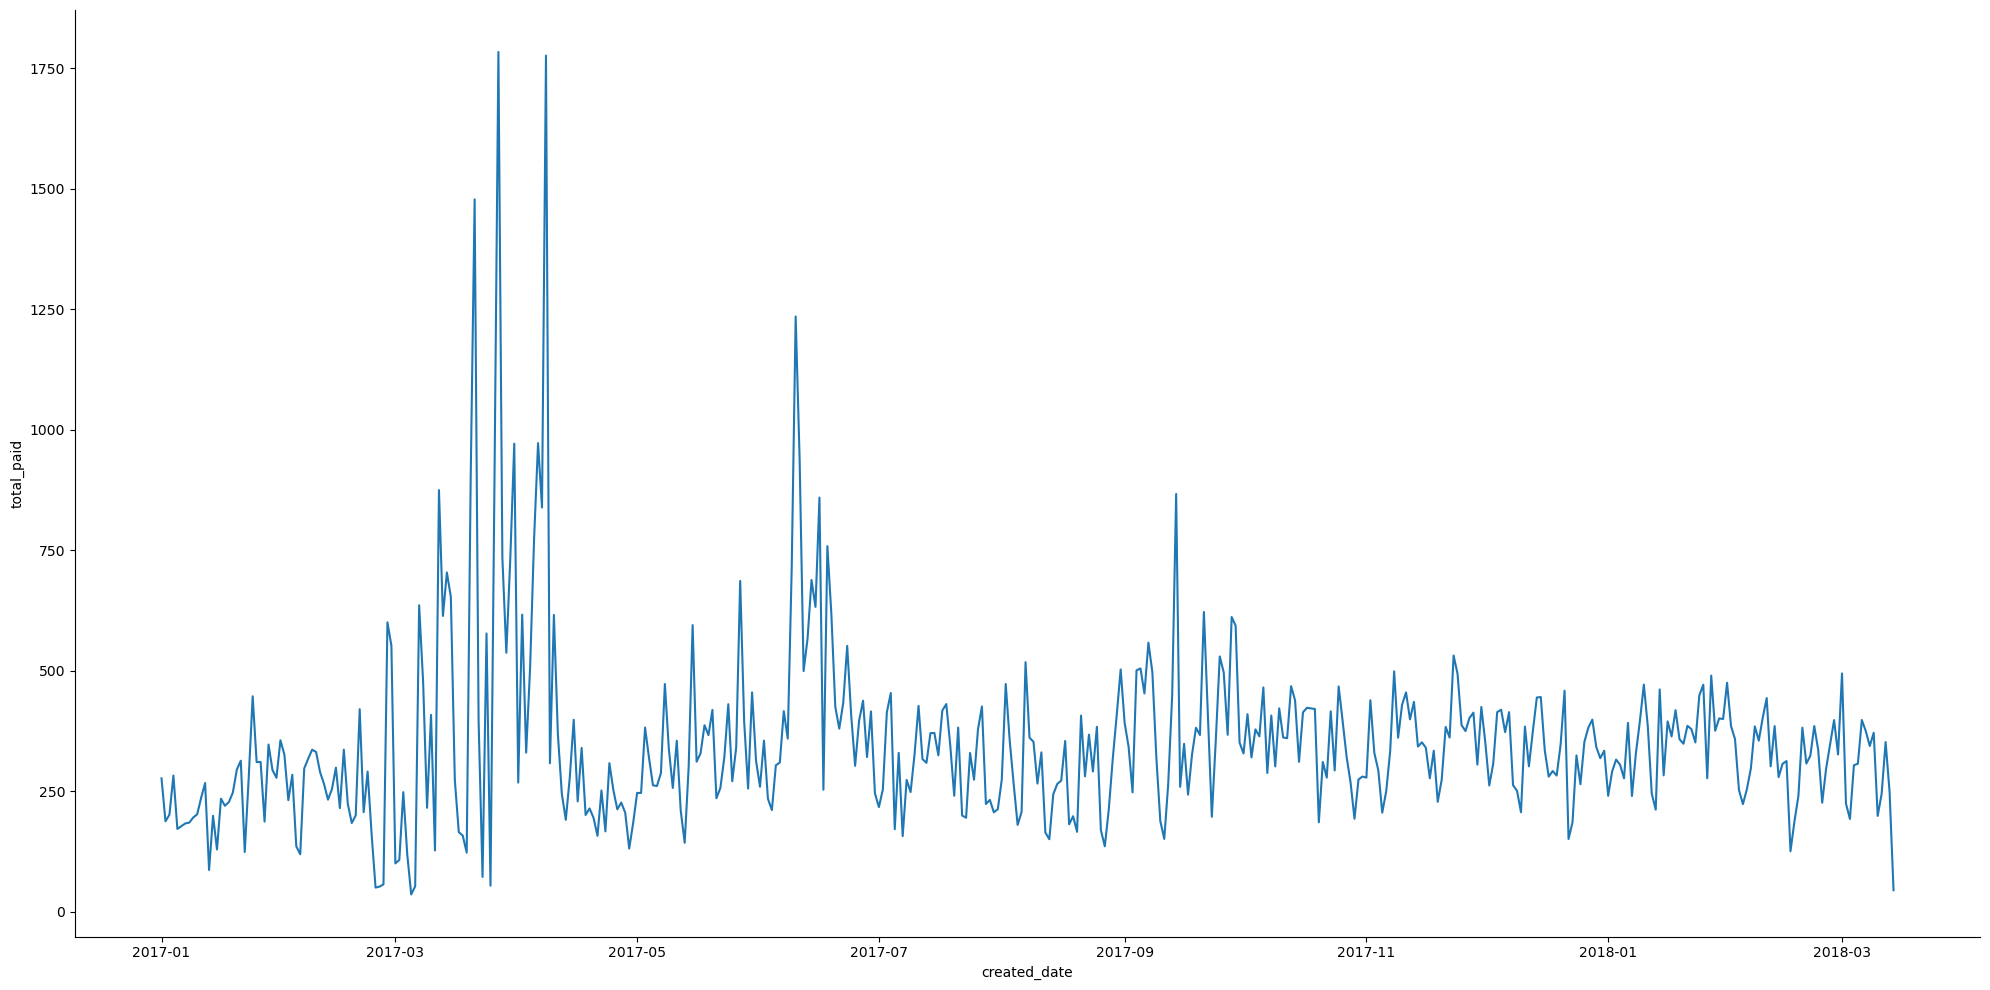

In [8]:
sns.relplot(data=orders_qual_day, kind='line', x='created_date', y='total_paid', height=10, aspect=2);

## Make a bar plot for the top 10 products sold in January 2017 & the top 10 products sold in January 2018.

In [9]:
discounts_categories_df['date'] = pd.to_datetime(discounts_categories_df['date'])

jan_2017 = discounts_categories_df.loc[discounts_categories_df["date"].dt.to_period('M') == '2017-01'].groupby("sku").product_quantity.sum().reset_index().nlargest(10, "product_quantity")
jan_2017["date"] = '2017-01'

jan_2018 = discounts_categories_df.loc[discounts_categories_df["date"].dt.to_period('M') == '2018-01'].groupby("sku").product_quantity.sum().reset_index().nlargest(10, "product_quantity")
jan_2018["date"] = '2018-01'

In [10]:
#Merging the two tables for 2017 and 2018
top_sellers = pd.concat([jan_2017, jan_2018])

In [11]:
#Listing the names of the products:

top_sellers = top_sellers.merge(
    products_qual,
    how='left',
    on='sku'
)

top_sellers.head(3)

,sku,product_quantity,date,name,desc,price,in_stock,type
0,APP0698,208,2017-01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
1,BEL0198,138,2017-01,Belkin Rockstar Road 4 USB Car Charger 7.2A Black,Car Charger with 4 USB ports (1A and 2.4A) for...,34.99,1,13615399
2,JAW0048,117,2017-01,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404


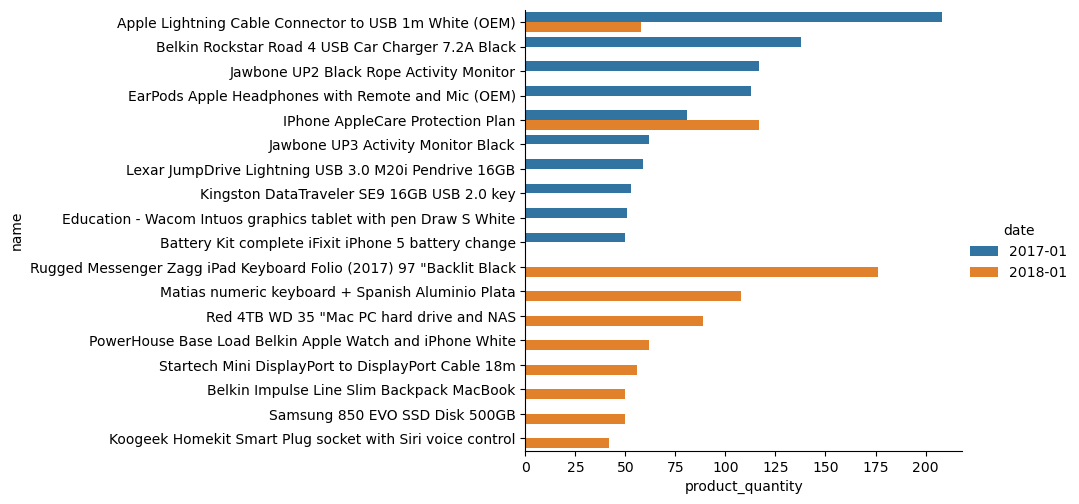

In [12]:
sns.catplot(
    data = top_sellers,
    kind = "bar",
    y = "name",
    x = "product_quantity",
    hue = "date"
);

## Find the top 10 brands that have generated the most revenue in the snapshot we have. Show the daily revenue generated by each of these brands on a line plot, use a seperate line for each brand.

In [13]:
jan_2017_revenue = discounts_categories_df.loc[discounts_categories_df["date"].dt.to_period('M') == '2017-01'].groupby("sku").unit_price_total.sum().reset_index().nlargest(10, "unit_price_total")
jan_2017_revenue["date"] = '2017-01'

jan_2018_revenue = discounts_categories_df.loc[discounts_categories_df["date"].dt.to_period('M') == '2018-01'].groupby("sku").unit_price_total.sum().reset_index().nlargest(10, "unit_price_total")
jan_2018_revenue["date"] = '2018-01'

In [14]:
#Merging the two tables for 2017 and 2018
top_sellers_revenue = pd.concat([jan_2017_revenue, jan_2018_revenue])

In [15]:
#Listing the names of the products:

top_sellers_revenue = top_sellers_revenue.merge(
    products_qual,
    how='left',
    on='sku'
)

top_sellers.head(3)

,sku,product_quantity,date,name,desc,price,in_stock,type
0,APP0698,208,2017-01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
1,BEL0198,138,2017-01,Belkin Rockstar Road 4 USB Car Charger 7.2A Black,Car Charger with 4 USB ports (1A and 2.4A) for...,34.99,1,13615399
2,JAW0048,117,2017-01,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404


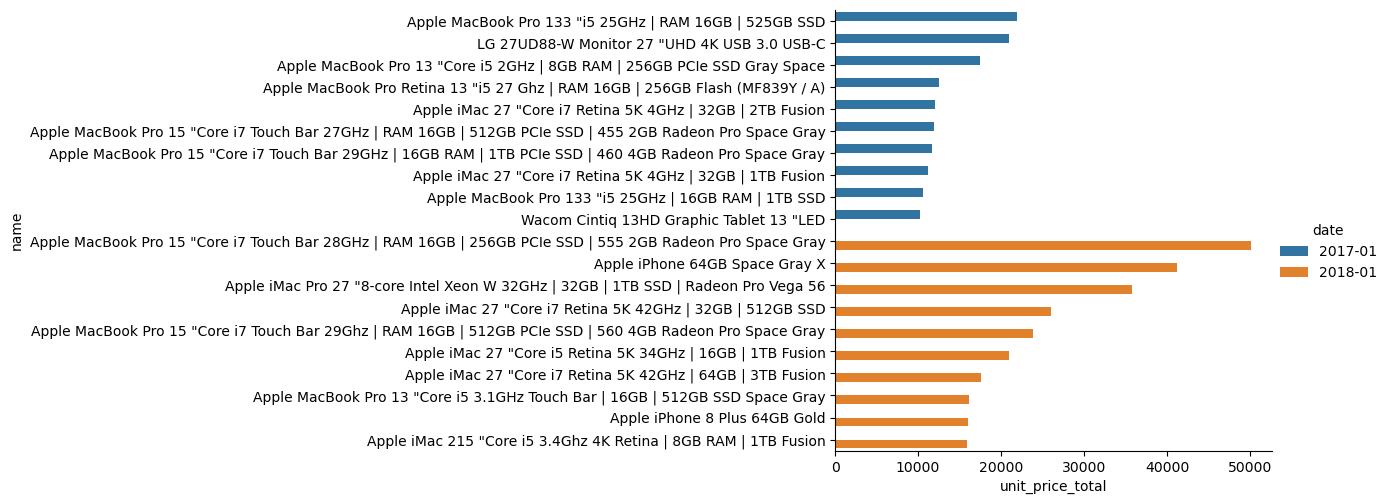

In [16]:
sns.catplot(
    data = top_sellers_revenue,
    kind = "bar",
    y = "name",
    x = "unit_price_total",
    hue = "date"
);

## Chart average Discounts per Product Category

In [17]:
category_avg_discount = discounts_categories_df.groupby(discounts_categories_df['category'])['discount_percentage'].mean().sort_values(ascending=False).reset_index()

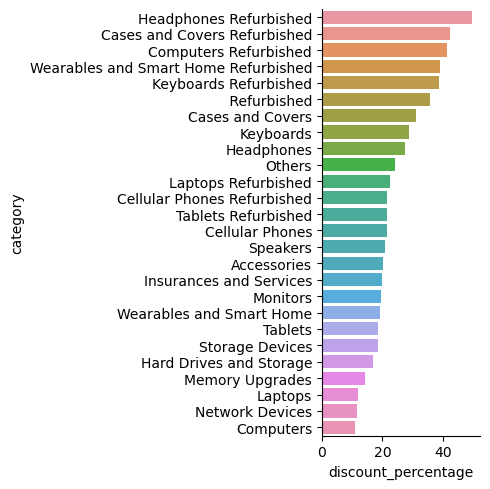

In [18]:
sns.catplot(
    data = category_avg_discount,
    x = "discount_percentage",
    y = "category",
    kind="bar"
);

In [19]:
category_new_avg_discount = discount_categories_new_df.groupby(discount_categories_new_df['category'])['discount_percentage'].mean().sort_values(ascending=False).reset_index()

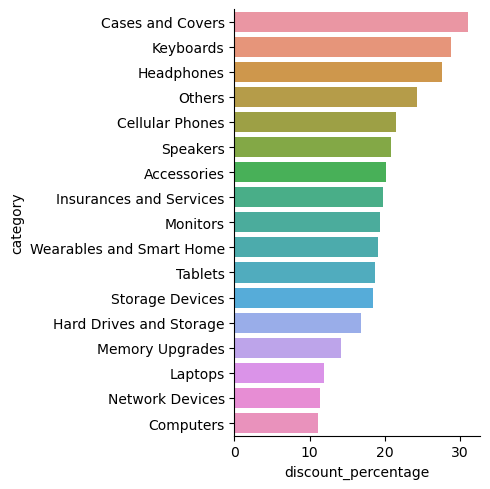

In [20]:
sns.catplot(
    data = category_new_avg_discount,
    x = "discount_percentage",
    y = "category",
    kind="bar"
);

In [21]:
category_ref_avg_discount = discount_categories_ref_df.groupby(discount_categories_ref_df['category'])['discount_percentage'].mean().sort_values(ascending=False).reset_index()

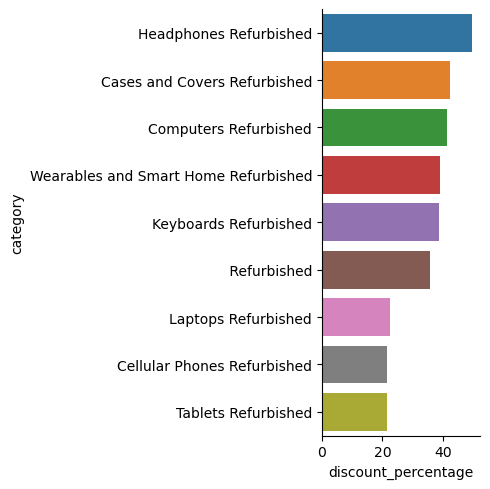

In [22]:
sns.catplot(
    data = category_ref_avg_discount,
    x = "discount_percentage",
    y = "category",
    kind="bar"
);

## Comparison sales and discounts Jan/Feb 2017 and Jan/Feb 2018

In [55]:
discounts_categories_df['date'] = pd.to_datetime(discounts_categories_df['date'])

jan_feb_2017 = discounts_categories_df.loc[(discounts_categories_df["date"].dt.to_period('M') == '2017-01') | (discounts_categories_df["date"].dt.to_period('M') == '2017-02')].agg({'product_quantity':'sum', 'unit_price_total':'sum', 'discount':'sum', 'discount_percentage':'mean'}).reset_index()  
jan_feb_2017_sku = discounts_categories_df.loc[(discounts_categories_df["date"].dt.to_period('M') == '2017-01') | (discounts_categories_df["date"].dt.to_period('M') == '2017-02')].groupby(['sku']).agg({'product_quantity':'sum', 'unit_price_total':'sum', 'discount':'sum', 'discount_percentage':'mean'}).reset_index()  

jan_feb_2018 = discounts_categories_df.loc[(discounts_categories_df["date"].dt.to_period('M') == '2018-01') | (discounts_categories_df["date"].dt.to_period('M') == '2018-02')].agg({'product_quantity':'sum', 'unit_price_total':'sum', 'discount':'sum', 'discount_percentage':'mean'}).reset_index()  
jan_feb_2018_sku = discounts_categories_df.loc[(discounts_categories_df["date"].dt.to_period('M') == '2018-01') | (discounts_categories_df["date"].dt.to_period('M') == '2018-02')].groupby(['sku']).agg({'product_quantity':'sum', 'unit_price_total':'sum', 'discount':'sum', 'discount_percentage':'mean'}).reset_index()

In [56]:
jan_feb_2017

,index,0
0,product_quantity,10253.00
1,unit_price_total,1685967.34
2,discount,274097.45
3,discount_percentage,22.67


In [57]:
jan_feb_2018

,index,0
0,product_quantity,11679.00
1,unit_price_total,2717194.21
2,discount,402539.94
3,discount_percentage,21.04


In [59]:
jan_feb_2018_sku

,sku,product_quantity,unit_price_total,discount,discount_percentage
0,8MO0009,2,29.40,40.60,58.00
1,8MO0010,1,16.99,18.01,51.00
2,8MO0011,4,79.96,45.03,43.00
3,8MO0012,2,25.98,44.02,63.00
4,ADN0019,1,7.99,0.00,0.00
...,...,...,...,...,...
2600,ZAG0037,26,229.74,455.00,69.18
2601,ZAG0038,1,22.49,7.50,25.00
2602,ZAG0040,1,26.99,13.00,33.00
2603,ZEP0007,1,125.99,24.00,16.00


In [60]:
#138/2288 products = 6% of all products are not discounted
jan_feb_2017_sku.loc[jan_feb_2017_sku['discount_percentage'] == 0].count()

sku                    138
product_quantity       138
unit_price_total       138
discount               138
discount_percentage    138
dtype: int64

In [62]:
#118/2605 products = 5% of all products are not discounted
jan_feb_2018_sku.loc[jan_feb_2018_sku['discount_percentage'] == 0].count()

sku                    118
product_quantity       118
unit_price_total       118
discount               118
discount_percentage    118
dtype: int64

In [31]:
discounts_categories_df.loc[discounts_categories_df['date'].dt.to_period('M') == '2017-01']

,id_order,date,sku,name,desc,type,unit_price,price,product_quantity,unit_price_total,discount,discount_percentage,price_group,discount_group,order_year,order_month,order_day,brand_name,category,price_comparison
4,245595,2017-01-21 12:49:00,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",Aluminum External Hard Drive 1TB capacity form...,11935397,52.99,103.95,2,105.98,50.96,49.00,-100.00,40-50,2017,1,21,Pack,Hard Drives and Storage,discounted
20,254301,2017-01-08 13:05:52,APP1676,Apple iPhone Silicone Case Cover Black 8/7/6,Ultrathin silicone case and microfiber premium...,11865403,28.92,39.00,1,28.92,10.08,26.00,-50.00,20-30,2017,1,8,Apple,Cases and Covers,discounted
24,254816,2017-01-12 15:44:04,APP1043,Apple USB-C Multiport Digital AV Adapter,C USB-HDMI adapter for MacBook high resolution.,12585395,48.76,79.00,1,48.76,30.24,38.00,-50.00,30-40,2017,1,12,Apple,Accessories,discounted
25,254816,2017-01-12 15:50:20,LAC0182,LaCie Porsche Design Mobile Hard Drive 4TB USB...,4TB External Hard Drive USB-C and USB 3.0 conn...,11935397,195.03,199.99,1,195.03,4.96,2.00,-200.00,0-5,2017,1,12,LaCie,Hard Drives and Storage,discounted
26,254816,2017-01-12 15:50:36,SAT0009,Satechi Slim Keypad Bluetooth Silver,Bluetooth keypad and rechargeable battery conn...,13855401,33.05,49.99,1,33.05,16.94,34.00,-50.00,30-40,2017,1,12,Satechi,Others,discounted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482,318541,2017-01-31 23:28:53,FCM0011-2,FCM Mac Memory 8GB (2x4GB) 1066MHz DDR3 DIMM,RAM 8GB (2x4GB) Mac Pro (2009/10).,1364,58.99,61.98,1,58.99,2.99,5.00,-100.00,5-10,2017,1,31,FCM,Memory Upgrades,discounted
6484,318542,2017-01-31 23:32:22,BEL0270,PowerHouse Base Load Belkin Apple Watch and iP...,Lightning charger and connection support and m...,13615399,90.24,99.99,1,90.24,9.75,10.00,-100.00,10-15,2017,1,31,Belkin,Accessories,discounted
6485,318545,2017-01-31 23:48:21,APP0206,60W MagSafe charger Apple MacBook and MacBook ...,Charger MacBook and 13 inch MacBook MagSafe 60...,13005399,89.00,89.00,1,89.00,0.00,0.00,-100.00,0,2017,1,31,Apple,Tablets,on price
6486,318546,2017-01-31 23:36:46,LEX0026,Lexar JumpDrive Lightning USB 3.0 M20i Pendriv...,Pendrive (MFI) with double connection: Lightni...,42945397,19.99,43.90,1,19.99,23.91,54.00,-50.00,50-100,2017,1,31,Lexar,Cellular Phones,discounted
